# Linear Regression
The purpose of this notebook is to practice training (also known as fitting), interpreting and evaluating linear regression predictive models. 
We will use Python packages: pandas, matplotlib and scikit-learn.
Besides the material presented in this notebook, please also read this [notebook](http://www.dataschool.io/linear-regression-in-python/) that is very well written, contains many useful details and gives pointers to further reading. 

Training a linear regression model means estimating a set of weights (one weight per feature, plus an extra weight called the bias or the intercept) on a dataset called the training set. 

The model estimated is a linear model taking the form:

$target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n $

The learned model can be used to predict the target feature for new examples where we know the descriptive features, but not the target feature. This is called the test example or the test data. In this notebook we will see the difference between evaluating the model on the training data and measuring the model error (called in-sample error) versus evaluating the model on the test data and measuring that error (called out-of-sample error). It is recommended that we always evaluate our model on a second dataset that was not used during training (that second dataset is usually called the test set). This way we avoid overfitting, which is the process of memorising the training data without actually achieving good generalisation ability to predict well on new data.

## Reading data

In [2]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [3]:
# Read a CSV dataset with 10 example offices into a dataframe.
# The data is described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).


# Read csv file into a dataframe.
df = pd.read_csv('Offices.csv')
df.head(10)

,ID,Size,Floor,BroadbandRate,EnergyRating,RentalPrice
0,1,500,4,8,C,320
1,2,550,7,50,A,380
2,3,620,9,7,A,400
3,4,630,5,24,B,390
4,5,665,8,100,C,385
5,6,700,4,8,B,410
6,7,770,10,7,B,480
7,8,880,12,50,A,600
8,9,920,14,8,C,570
9,10,1000,9,24,B,620


In [4]:
# Print the average RentalPrice in our dataset.
# We could use this as a very simple baseline prediction model.
# A better prediction model should at least improve on this baseline model.
df.RentalPrice.mean()

np.float64(455.5)

In [5]:
# Print the feature types in our dataset.
df.dtypes

ID                int64
Size              int64
Floor             int64
BroadbandRate     int64
EnergyRating     object
RentalPrice       int64
dtype: object

## Understanding data (no detailed data analysis here, onlsy scatter plots)

In [6]:
# Look at correlations for all the continuous features.
df[['Size', 'Floor', 'BroadbandRate', 'RentalPrice']].corr()

,Size,Floor,BroadbandRate,RentalPrice
Size,1.000000,0.710863,-0.069117,0.971262
Floor,0.710863,1.000000,0.054897,0.766020
BroadbandRate,-0.069117,0.054897,1.000000,-0.068597
RentalPrice,0.971262,0.766020,-0.068597,1.000000


In [7]:
# Print the correlation for a given pair of features.
df[['Size', 'RentalPrice']].corr().to_numpy()[0,1]

np.float64(0.9712620608629575)

<Axes: xlabel='BroadbandRate', ylabel='RentalPrice'>

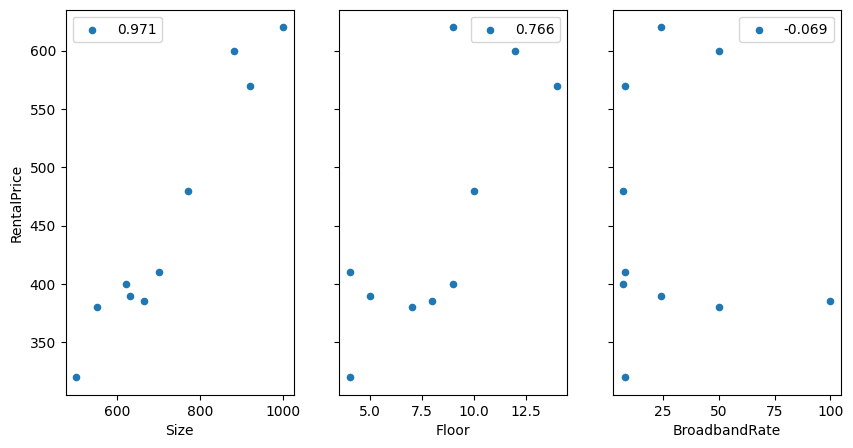

In [8]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
# This allows us to check strength of correlation with the target feature.
#plt.figure(figsize=(7, 3), dpi=100)
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Size', y='RentalPrice', label="%.3f" % df[['Size', 'RentalPrice']].corr().to_numpy()[0,1], ax=axs[0], figsize=(10, 5))
df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().to_numpy()[0,1], ax=axs[1])
df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().to_numpy()[0,1], ax=axs[2])

# Linear regression with package <span style="color:red">scikit-learn</span>

## Simple linear regression (one descriptive feature)

### Preparing the data

In [9]:
# Prepare the descriptive features
#print(df.head(10))
X = df[['Size', 'Floor', 'BroadbandRate']]
y = df.RentalPrice

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
    Size  Floor  BroadbandRate
0   500      4              8
1   550      7             50
2   620      9              7
3   630      5             24
4   665      8            100
5   700      4              8
6   770     10              7
7   880     12             50
8   920     14              8
9  1000      9             24

Target feature in y:
 0    320
1    380
2    400
3    390
4    385
5    410
6    480
7    600
8    570
9    620
Name: RentalPrice, dtype: int64


### Training a model

In [10]:
# Train a model using linear regression from scikit-learn.
# By default sklearn fits an intercept.
# Use only the descriptive feature Size.
features = ['Size']
linreg = LinearRegression().fit(X[features], y)

In [11]:
# The model learned is: RentalPrice = 6.46690 + 0.62064 * Size
# This means that for a unit increase in Size, we have a 0.62064 unit increase in RentalPrice.

# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg.intercept_)
print("Features: \n", features)
print("Coeficients: \n", linreg.coef_)


Intercept: 
 6.46689980730207
Features: 
 ['Size']
Coeficients: 
 [0.62064008]


### Prediction with the model
Using the trained model to predict the target feature RentalPrice, given the descriptive feature Size.

In [12]:
# Predicted scores for each example. 
linreg_predictions = linreg.predict(X[['Size']])

#print("Predicted scores:", predicted_scores)
#print("\nPrediction for first example (Size, RentalPrice, PredictedScore): ", X['Size'].values[0], y.values[0], linreg_predictions[0])
actual_vs_predicted = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted

,RentalPrice,Predicted
0,320,316.786941
1,380,347.818946
2,400,391.263751
3,390,397.470152
4,385,419.192555
5,410,440.914958
6,480,484.359764
7,600,552.630173
8,570,577.455776
9,620,627.106983


In [13]:
# The model learned is: RentalPrice = 6.46690 + 0.62064 * Size
# This means that for a unit increase in Size, we have a 0.62064 increase in RentalPrice.
# We can use the learned model to predict the RentalPrice for a new office Size.

# The Statsmodels predict() method expects a dataframe object.
# Create a new dataframe with a new test example. 
X_new = pd.DataFrame({'Size': [730]})
X_new.head()

,Size
0,730


In [14]:
# Predict the RentalPrice for a new office with Size 730, using the trained model. 
# The predicted value is 459.53.
linreg.predict(X_new)

array([459.53416054])

### Plotting the trained model

In [15]:
# We can plot the regression line that was estimated from our trainign set.
# First we use the trained model to predict prices for the min and max Size in our dataset.
X_minmax = pd.DataFrame({'Size': [df.Size.min(), df.Size.max()]})
X_minmax.head()


,Size
0,500
1,1000


In [16]:
# Make predictions for the min and max Size values and store them.
predictions_minmax = linreg.predict(X_minmax)
predictions_minmax

array([316.78694141, 627.106983  ])

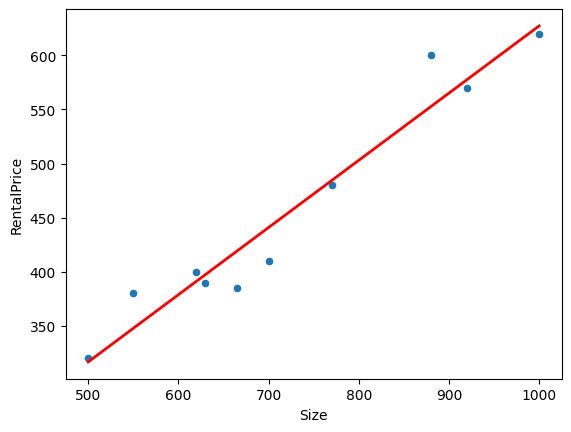

In [17]:
# First, plot the observed data
df.plot(kind='scatter', x='Size', y='RentalPrice')

# Next, plot the regression line, in red.
plt.plot(X_minmax, predictions_minmax, c='red', linewidth=2)

## Multiple linear regression (using more than one feature)

### Preparing the data

In [18]:
# Prepare the descriptive features
#print(df.head(10))
#cont_features = ['Size']
cont_features = ['Size', 'Floor', 'BroadbandRate']

X = df[cont_features]
y = df.RentalPrice

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
    Size  Floor  BroadbandRate
0   500      4              8
1   550      7             50
2   620      9              7
3   630      5             24
4   665      8            100
5   700      4              8
6   770     10              7
7   880     12             50
8   920     14              8
9  1000      9             24

Target feature in y:
 0    320
1    380
2    400
3    390
4    385
5    410
6    480
7    600
8    570
9    620
Name: RentalPrice, dtype: int64


### Training the model

In [19]:
# Use more features for training
# Train aka fit, a model using all continuous features.

linreg = LinearRegression().fit(X[cont_features], y)

# Print the weights learned for each feature.
print("Features: \n", cont_features)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)

feature_importance = pd.DataFrame({'feature': cont_features, 'importance':linreg.coef_})
feature_importance.sort_values('importance', ascending=False)

Features: 
 ['Size', 'Floor', 'BroadbandRate']
Coeficients: 
 [ 0.54873985  4.96354677 -0.06209515]

Intercept: 
 19.561558897449686


,feature,importance
1,Floor,4.963547
0,Size,0.548740
2,BroadbandRate,-0.062095


### Prediction with the trained model
Using the trained model to predict the target feature RentalPrice, given the descriptive features Size, Floor  BroadbandRate.

In [20]:
linreg_predictions = linreg.predict(X[cont_features])

print("\nPredictions with linear regression: \n")
actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(actual_vs_predicted_linreg)


Predictions with linear regression: 

   RentalPrice   Predicted
0          320  313.288908
1          380  353.008544
2          400  404.017519
3          390  388.595112
4          385  417.972416
5          410  423.036877
6          480  491.292042
7          600  558.910427
8          570  593.395111
9          620  611.483043


In [21]:
#Pair the actual and the predicted values
#This can be done directly with sklearn functions, but below is a manual example to understand how it works
prediction_errors = y - linreg_predictions
print("Actual - Predicted:\n", prediction_errors)
print("\n(Actual - Predicted) squared:\n", prediction_errors**2)
print("\n Sum of (Actual - Predicted) squared:\n", (prediction_errors**2).sum())


Actual - Predicted:
 0     6.711092
1    26.991456
2    -4.017519
3     1.404888
4   -32.972416
5   -13.036877
6   -11.292042
7    41.089573
8   -23.395111
9     8.516957
Name: RentalPrice, dtype: float64

(Actual - Predicted) squared:
 0      45.038756
1     728.538680
2      16.140455
3       1.973709
4    1087.180212
5     169.960169
6     127.510219
7    1688.352971
8     547.331226
9      72.538563
Name: RentalPrice, dtype: float64

 Sum of (Actual - Predicted) squared:
 4484.564959646265


In [22]:
# Print the Mean Squared Error of the model on the training set
mse = (prediction_errors** 2).mean()
rmse = ((prediction_errors** 2).mean())**0.5

print("\nMean Squared Error:\n", mse)
print("\nRoot Mean Squared Error:\n", rmse)


Mean Squared Error:
 448.4564959646265

Root Mean Squared Error:
 21.176791446407233


In [23]:
print("|Actual - Predicted|:\n", abs(prediction_errors))

|Actual - Predicted|:
 0     6.711092
1    26.991456
2     4.017519
3     1.404888
4    32.972416
5    13.036877
6    11.292042
7    41.089573
8    23.395111
9     8.516957
Name: RentalPrice, dtype: float64


In [24]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(prediction_errors).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 16.942793036576195


In [25]:
# Print the R2 of the model on the training set
#Pair the actual and the predicted values
#This can be done directly with sklearn functions, 
#but below is a manual example to understand how it works

prediction_errors = y - linreg_predictions
#print("Actual - Predicted:\n", prediction_errors)
#print("\n(Actual - Predicted) squared:\n", prediction_errors**2)
print("\n Sum of squared errors:\n", sum(prediction_errors**2))

avg_predictions =np.ones(y.shape[0])* df.RentalPrice.mean()

print("\nAverageModelPredictions:\n", avg_predictions)
avgpredictions_errors = y - avg_predictions
print("Actual - AvgPredictions:\n", avgpredictions_errors)
print("\n(Actual - AvgPredictions) squared:\n", avgpredictions_errors**2)
print("\n Total sum of squared errors:\n", sum(avgpredictions_errors**2))

r2 = 1 - sum(prediction_errors**2)/sum(avgpredictions_errors**2)
print("\n R2:\n", r2)



 Sum of squared errors:
 4484.564959646265

AverageModelPredictions:
 [455.5 455.5 455.5 455.5 455.5 455.5 455.5 455.5 455.5 455.5]
Actual - AvgPredictions:
 0   -135.5
1    -75.5
2    -55.5
3    -65.5
4    -70.5
5    -45.5
6     24.5
7    144.5
8    114.5
9    164.5
Name: RentalPrice, dtype: float64

(Actual - AvgPredictions) squared:
 0    18360.25
1     5700.25
2     3080.25
3     4290.25
4     4970.25
5     2070.25
6      600.25
7    20880.25
8    13110.25
9    27060.25
Name: RentalPrice, dtype: float64

 Total sum of squared errors:
 100122.5

 R2:
 0.9552092191101275


In [26]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
        

In [27]:
printMetrics(y, linreg_predictions)


MAE:  16.942793036576195
RMSE:  21.176791446407233
R2:  0.9552092191101275


# Training with continuous and categorical features

In [28]:
# Use more features for training
# Train aka fit, a model using all continuous and categorical features.
EnergyRating_dummies = pd.get_dummies(df['EnergyRating'], prefix='EnergyRating', drop_first=True, dtype = int) 
print("EnergyRatingDummies:\n", EnergyRating_dummies)

categ_features = EnergyRating_dummies.columns.values.tolist()

features = cont_features + categ_features
print("\nCont features: ", cont_features)
print("Categ features: ", categ_features)
print("Features: ", features)

EnergyRatingDummies:
    EnergyRating_B  EnergyRating_C
0               0               1
1               0               0
2               0               0
3               1               0
4               0               1
5               1               0
6               1               0
7               0               0
8               0               1
9               1               0

Cont features:  ['Size', 'Floor', 'BroadbandRate']
Categ features:  ['EnergyRating_B', 'EnergyRating_C']
Features:  ['Size', 'Floor', 'BroadbandRate', 'EnergyRating_B', 'EnergyRating_C']


In [29]:
df_all = pd.concat([df, EnergyRating_dummies], axis=1)
print(df_all)

df_all = df_all.drop('EnergyRating', axis = 1)
print(df_all)

   ID  Size  Floor  BroadbandRate EnergyRating  RentalPrice  EnergyRating_B  \
0   1   500      4              8            C          320               0   
1   2   550      7             50            A          380               0   
2   3   620      9              7            A          400               0   
3   4   630      5             24            B          390               1   
4   5   665      8            100            C          385               0   
5   6   700      4              8            B          410               1   
6   7   770     10              7            B          480               1   
7   8   880     12             50            A          600               0   
8   9   920     14              8            C          570               0   
9  10  1000      9             24            B          620               1   

   EnergyRating_C  
0               1  
1               0  
2               0  
3               0  
4               1  
5         

In [30]:
#We can also do this directly for all categorical features
df = pd.get_dummies(df, drop_first=True, dtype = int)
df

,ID,Size,Floor,BroadbandRate,RentalPrice,EnergyRating_B,EnergyRating_C
0,1,500,4,8,320,0,1
1,2,550,7,50,380,0,0
2,3,620,9,7,400,0,0
3,4,630,5,24,390,1,0
4,5,665,8,100,385,0,1
5,6,700,4,8,410,1,0
6,7,770,10,7,480,1,0
7,8,880,12,50,600,0,0
8,9,920,14,8,570,0,1
9,10,1000,9,24,620,1,0


In [31]:
X = df_all[features]
y = df_all.RentalPrice

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
    Size  Floor  BroadbandRate  EnergyRating_B  EnergyRating_C
0   500      4              8               0               1
1   550      7             50               0               0
2   620      9              7               0               0
3   630      5             24               1               0
4   665      8            100               0               1
5   700      4              8               1               0
6   770     10              7               1               0
7   880     12             50               0               0
8   920     14              8               0               1
9  1000      9             24               1               0

Target feature in y:
 0    320
1    380
2    400
3    390
4    385
5    410
6    480
7    600
8    570
9    620
Name: RentalPrice, dtype: int64


In [32]:
# Use more features for training
# Train aka fit, a model using all continuous and categorical features.

categ_linreg = LinearRegression().fit(X, y)

# Print the weights learned for each feature.
#print("Features: \n", features)
#print("Coeficients: \n", categ_linreg.coef_)
print("\nIntercept: \n", categ_linreg.intercept_)
print("Features and coeficients:", list(zip(features, categ_linreg.coef_)))

feature_importance = pd.DataFrame({'feature': features, 'importance':categ_linreg.coef_})
feature_importance.sort_values('importance', ascending=False)


Intercept: 
 25.080947305273526
Features and coeficients: [('Size', np.float64(0.6431537548899604)), ('Floor', np.float64(0.016720058467198262)), ('BroadbandRate', np.float64(-0.13248786053570658)), ('EnergyRating_B', np.float64(-46.55546395082575)), ('EnergyRating_C', np.float64(-42.09485018646428))]


,feature,importance
0,Size,0.643154
1,Floor,0.016720
2,BroadbandRate,-0.132488
4,EnergyRating_C,-42.094850
3,EnergyRating_B,-46.555464


In [33]:
categ_linreg_predictions = categ_linreg.predict(X[features])

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_linreg = pd.concat([df.RentalPrice, pd.DataFrame(categ_linreg_predictions, columns=['Predicted'], index=df.index)], axis=1)
print(actual_vs_predicted_linreg)


Predictions with multiple linear regression: 

   RentalPrice   Predicted
0          320  303.569952
1          380  372.308160
2          400  423.059341
3          390  380.616241
4          385  397.568319
5          410  427.740089
6          480  472.993660
7          600  584.632499
8          570  573.861730
9          620  618.650010


In [34]:
printMetrics(y, categ_linreg_predictions)


MAE:  11.445895610626838
RMSE:  13.128429922471305
R2:  0.9827855205144458


# Evaluation with train/test split

In [35]:
# Split the data into train and test sets
# Take a third (random) data samples as test data, rest as training data
# Note that this training set is very small and the model will not be very reliable due to this sample size problem.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# If we want to get the same train/test split every time we run, we can set the random_state variable to a fixed value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
    Size  Floor  BroadbandRate  EnergyRating_B  EnergyRating_C  RentalPrice
9  1000      9             24               1               0          620
1   550      7             50               0               0          380
6   770     10              7               1               0          480
7   880     12             50               0               0          600
3   630      5             24               1               0          390
0   500      4              8               0               1          320
5   700      4              8               1               0          410

Test data:
    Size  Floor  BroadbandRate  EnergyRating_B  EnergyRating_C  RentalPrice
2   620      9              7               0               0          400
8   920     14              8               0               1          570
4   665      8            100               0               1          385


In [36]:
# Train on the training sample and test on the test sample.
linreg = LinearRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
#print(linreg_train.coef_)
print("Features and coeficients:", list(zip(features, linreg.coef_)))

feature_importance = pd.DataFrame({'feature': features, 'importance':categ_linreg.coef_})
feature_importance.sort_values('importance', ascending=False)

Features and coeficients: [('Size', np.float64(0.5736313285095399)), ('Floor', np.float64(5.3084695650788625)), ('BroadbandRate', np.float64(0.8572287866561733)), ('EnergyRating_B', np.float64(-6.7866198549002705)), ('EnergyRating_C', np.float64(18.530927277045194))]


,feature,importance
0,Size,0.643154
1,Floor,0.016720
2,BroadbandRate,-0.132488
4,EnergyRating_C,-42.094850
3,EnergyRating_B,-46.555464


In [37]:
X_train

,Size,Floor,BroadbandRate,EnergyRating_B,EnergyRating_C
9,1000,9,24,1,0
1,550,7,50,0,0
6,770,10,7,1,0
7,880,12,50,0,0
3,630,5,24,1,0
0,500,4,8,0,1
5,700,4,8,1,0


In [38]:
y_train

9    620
1    380
6    480
7    600
3    390
0    320
5    410
Name: RentalPrice, dtype: int64

In [39]:
# Predicted price on training set
train_predictions = linreg.predict(X_train)

print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
printMetrics(y_train, train_predictions)

Actual vs predicted on training:
    RentalPrice   Predicted
9          620  621.756126
1          380  382.079657
6          480  480.556500
7          600  597.920343
3          390  388.278656
0          320  320.000000
5          410  409.408719

MAE:  1.2549378821125694
RMSE:  1.4811315498526822
R2:  0.9998054763251348


In [40]:
# Predicted price on test set
test_predictions = linreg.predict(X_test)
print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))
printMetrics(y_test, test_predictions)

Actual vs predicted on test:
    RentalPrice   Predicted
2          400  395.989951
8          570  614.009854
4          385  514.748096

MAE:  59.255999426238496
RMSE:  79.13599282428626
R2:  0.11029915954902325


# Evaluation with cross-validation

In [41]:
#sorted(metrics.SCORERS.keys())

In [ ]:
scores = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)
print("Avg MAE score over 5 folds:", np.mean(scores))
print("Stddev MAE score over 5 folds:", np.std(scores))

[43.46049301 28.52278234 53.27445054 21.51730931  8.2908062 ]
Avg MAE score over 5 folds: 31.013168279170685
Stddev MAE score over 5 folds: 15.894525339987181


In [43]:
eval_measures = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scores = cross_validate(LinearRegression(), X, y, scoring=eval_measures, cv=5)
scores

{'fit_time': array([0.00400019, 0.0039959 , 0.0019989 , 0.00199986, 0.00313711]),
 'score_time': array([0.0030036 , 0.00400043, 0.00300026, 0.00500226, 0.00500298]),
 'test_neg_mean_absolute_error': array([-43.46049301, -28.52278234, -53.27445054, -21.51730931,
         -8.2908062 ]),
 'test_neg_mean_squared_error': array([-2488.01107511, -1034.8429953 , -4195.344399  ,  -551.70794832,
         -131.38455052]),
 'test_r2': array([ -1.76445675, -40.39371981, -25.85020415,   0.84674779,
          0.78978472])}

In [44]:
scores = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)
print("Avg MAE score over 5 folds:", np.mean(scores))
print("Stddev MAE score over 5 folds:", np.std(scores))


[43.46049301 28.52278234 53.27445054 21.51730931  8.2908062 ]
Avg MAE score over 5 folds: 31.013168279170685
Stddev MAE score over 5 folds: 15.894525339987181


In [45]:
scores = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5)
print(scores)
#print("Avg MSE score over 5 folds:", np.mean(scores))
#print("Stddev MSE score over 5 folds:", np.std(scores))

rmse = scores**0.5
print("Avg RMSE score over 5 folds:", np.mean(rmse))
print("Stddev RMSE score over 5 folds:", np.std(rmse))

[2488.01107511 1034.8429953  4195.344399    551.70794832  131.38455052]
Avg RMSE score over 5 folds: 36.35423895444225
Stddev RMSE score over 5 folds: 18.937462968760833


## Example of regularised linear regression (tends to be more robust and accurate than plain linear regression)

In [46]:
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

#for more example of regression algorithms check out this code for a regression data challenge: 
# https://github.com/mlgig/vistamilk-spectroscopy-challenge/blob/main/29042021-MLGIGTeam-tabular-models-notebook.ipynb

In [47]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
#ridgecv = RidgeCV(normalize=True).fit(X_train, y_train)

# Print the weights learned for each feature.
print("LinReg")
print("\nIntercept: \n", linreg.intercept_)
print("Features and coeficients:", list(zip(features, linreg.coef_))[:10])
#print("Sorted features and coefs: \n", sorted(ridgecv.coef_, reverse=False)[:10])

# Predicted price on test set
test_predictions = linreg.predict(X_test)
printMetrics(y_test, test_predictions)
#print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1).sort_values('kappa_casein'))

feature_importance = pd.DataFrame({'feature': features, 'importance':linreg.coef_})
feature_importance.sort_values('importance', ascending=False)

LinReg

Intercept: 
 -13.43830008537958
Features and coeficients: [('Size', np.float64(0.5736313285095399)), ('Floor', np.float64(5.3084695650788625)), ('BroadbandRate', np.float64(0.8572287866561733)), ('EnergyRating_B', np.float64(-6.7866198549002705)), ('EnergyRating_C', np.float64(18.530927277045194))]

MAE:  59.255999426238496
RMSE:  79.13599282428626
R2:  0.11029915954902325


,feature,importance
4,EnergyRating_C,18.530927
1,Floor,5.308470
2,BroadbandRate,0.857229
0,Size,0.573631
3,EnergyRating_B,-6.786620


In [48]:
lasso = Lasso()

lasso.fit(X_train, y_train)

# Print the weights learned for each feature.
print("Lasso")
print("\nIntercept: \n", lasso.intercept_)
print("Features and coeficients:", list(zip(features, lasso.coef_))[:10])
#print("Sorted features and coefs: \n", sorted(ridgecv.coef_, reverse=False)[:10])

# Predicted price on test set
test_predictions = lasso.predict(X_test)
printMetrics(y_test, test_predictions)
#print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1).sort_values('kappa_casein'))

feature_importance = pd.DataFrame({'feature': features, 'importance':lasso.coef_})
feature_importance.sort_values('importance', ascending=False)

Lasso

Intercept: 
 4.956812804272602
Features and coeficients: [('Size', np.float64(0.5660720105766139)), ('Floor', np.float64(4.921132753277452)), ('BroadbandRate', np.float64(0.6705974800827407)), ('EnergyRating_B', np.float64(-11.922460585393699)), ('EnergyRating_C', np.float64(0.0))]

MAE:  45.911015765122634
RMSE:  61.9057441685862
R2:  0.4555502691460457


,feature,importance
1,Floor,4.921133
2,BroadbandRate,0.670597
0,Size,0.566072
4,EnergyRating_C,0.000000
3,EnergyRating_B,-11.922461


In [49]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
#ridgecv = RidgeCV().fit(X_train, y_train)

# Print the weights learned for each feature.
print("Ridge")
print("\nIntercept: \n", ridge.intercept_)
print("Features and coeficients:", list(zip(features, ridge.coef_))[:10])
#print("Sorted features and coefs: \n", sorted(ridgecv.coef_, reverse=False)[:10])

# Predicted price on test set
test_predictions = ridge.predict(X_test)
printMetrics(y_test, test_predictions)
#print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1).sort_values('kappa_casein'))

feature_importance = pd.DataFrame({'feature': features, 'importance':ridge.coef_})
feature_importance.sort_values('importance', ascending=False)

Ridge

Intercept: 
 -8.050461828390723
Features and coeficients: [('Size', np.float64(0.5739246413995716)), ('Floor', np.float64(5.154092074173867)), ('BroadbandRate', np.float64(0.7777401832687474)), ('EnergyRating_B', np.float64(-9.823597770360475)), ('EnergyRating_C', np.float64(12.954410518509759))]

MAE:  54.08353121120634
RMSE:  73.58124007809367
R2:  0.23081625851822374


,feature,importance
4,EnergyRating_C,12.954411
1,Floor,5.154092
2,BroadbandRate,0.777740
0,Size,0.573925
3,EnergyRating_B,-9.823598


In [50]:
#Example using a pipeline to use different functions on the same data: scaling features, followed by feature selection, followed by poly2 features, followed by learning algorithm
# Each step in the pipeline can be commented out to check the effect of each step
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

algo = Pipeline([ ('feature_scaler', StandardScaler()),
                  ('feature_selection', SelectFromModel(RidgeCV())), 
                  # ('fpoly', PolynomialFeatures(degree=2)), 
                   ('learner', RidgeCV())
                   ])

'''
algo = make_pipeline(StandardScaler(),
                  SelectFromModel(RidgeCV()),
                  PolynomialFeatures(degree=2), 
                  RidgeCV()
                   )
'''

algo.fit(X_train, y_train)
#ridgecv = RidgeCV().fit(X_train, y_train)

# Print the weights learned for each feature.
print("Pipeline:", algo)

# Predicted price on test set
test_predictions = algo.predict(X_test)
printMetrics(y_test, test_predictions)
#print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1).sort_values('kappa_casein'))


Pipeline: Pipeline(steps=[('feature_scaler', StandardScaler()),
                ('feature_selection', SelectFromModel(estimator=RidgeCV())),
                ('learner', RidgeCV())])

MAE:  17.867788703493222
RMSE:  23.59088919609442
R2:  0.9209349569445676
